In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-x-ray-10000-images/train_covid19.py
/kaggle/input/covid-19-x-ray-10000-images/covid19.model
/kaggle/input/covid-19-x-ray-10000-images/requirements.txt
/kaggle/input/covid-19-x-ray-10000-images/generate_images.py
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0266-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0253-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0265-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0243-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0217-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0223-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0227-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0235-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0218-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0216-0001.jpeg
/kaggle/input/c

In [15]:
import glob
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.preprocessing.image import img_to_array

from keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D
from keras.layers import AvgPool2D,MaxPool2D,Dense,Flatten
from keras.layers import Activation,Dropout,BatchNormalization
from keras.optimizers import Adam,SGD,RMSprop


In [16]:
data = "/kaggle/input/covid-19-x-ray-10000-images/dataset"

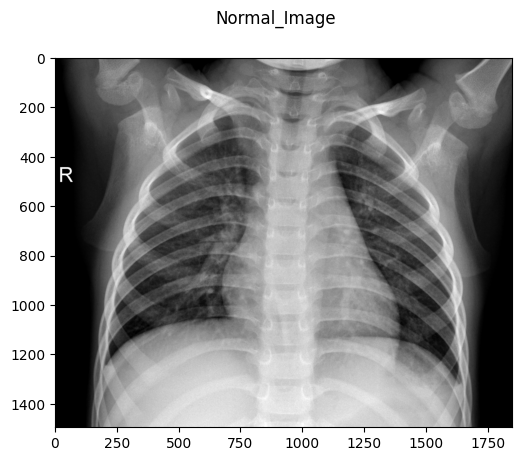

In [17]:
normal_image = []
for img_path in glob.glob(data +'/normal/*'):
    normal_image.append(mpimg.imread(img_path))
fig = plt.figure()
fig.suptitle('Normal_Image')
plt.imshow(normal_image[0],cmap='gray')


In [18]:
os.listdir(data)

['normal', 'covid']

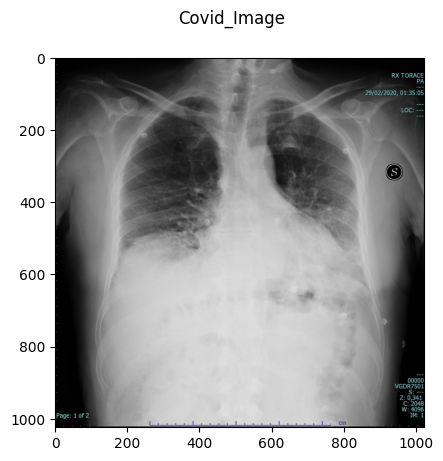

In [19]:
covid_image = []

for img_path in glob.glob(data +'/covid/*'):
    covid_image.append(mpimg.imread(img_path))
fig = plt.figure()
fig.suptitle('Covid_Image')
plt.imshow(covid_image[0],cmap='gray')


In [22]:
Image_Width = 150
Image_Height = 150
Cannels = 3
INPUT_SHAPE = (Image_Width,Image_Height,Cannels)
NB_CLASSES = 2
EPOCHS = 45
BATCH_SIZE =6




In [23]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))

model.add(Conv2D(250,(3,3)))
model.add(Activation('relu'))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(AvgPool2D(2,2))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [24]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 70, 250)       144250    
                                                      

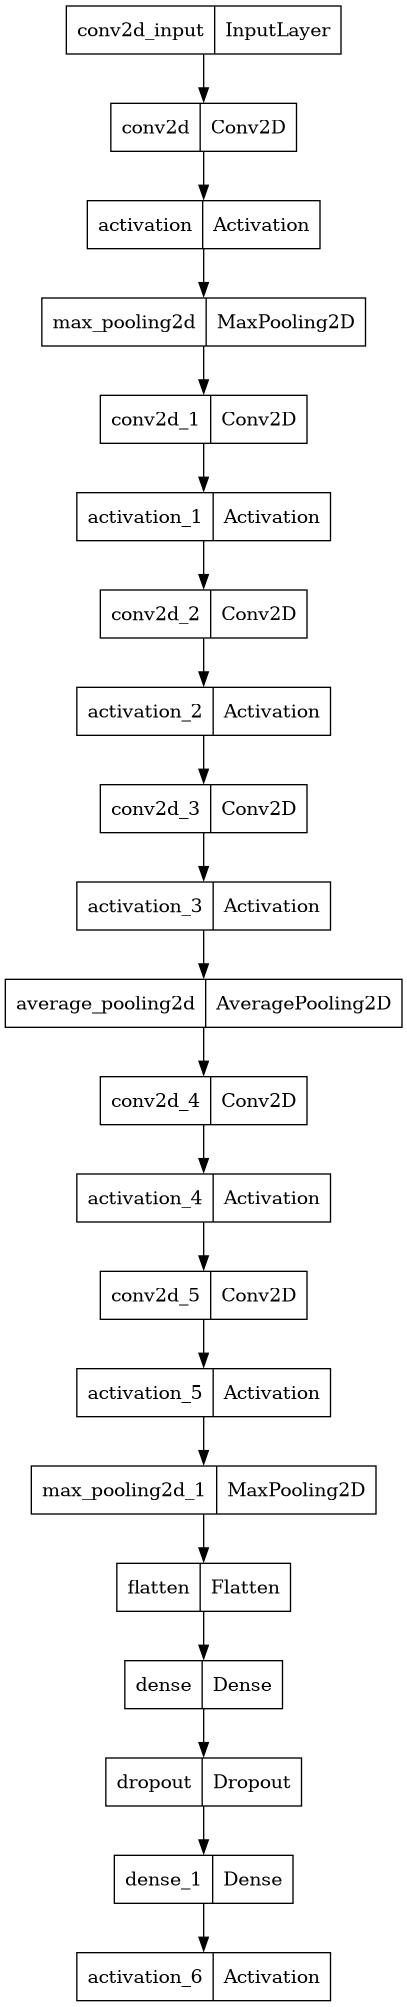

In [25]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model,to_file = 'model1.png')

In [26]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True,validation_split = 0.25)
train_generator = train_datagen.flow_from_directory(data,target_size=(Image_Height,Image_Width), batch_size =BATCH_SIZE,class_mode='binary',subset='training')
validation_generator = train_datagen.flow_from_directory(data,target_size=(Image_Height,Image_Width),batch_size =BATCH_SIZE,class_mode='binary',shuffle = False,subset='validation')
history = model.fit_generator(train_generator,steps_per_epoch = train_generator.samples // BATCH_SIZE,validation_data =validation_generator,validation_steps =validation_generator.samples // BATCH_SIZE,epochs =EPOCHS)

Found 74 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


/tmp/ipykernel_42/451035807.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch = train_generator.samples // BATCH_SIZE,validation_data =validation_generator,validation_steps =validation_generator.samples // BATCH_SIZE,epochs =EPOCHS)


Epoch 1/45
12/12 [==============================] - 16s 288ms/step - loss: 3.1006 - accuracy: 0.6471 - val_loss: 0.6129 - val_accuracy: 0.7083
Epoch 2/45
12/12 [==============================] - 2s 205ms/step - loss: 0.6702 - accuracy: 0.7059 - val_loss: 0.6047 - val_accuracy: 0.7083
Epoch 3/45
12/12 [==============================] - 2s 194ms/step - loss: 0.5191 - accuracy: 0.7794 - val_loss: 10.7574 - val_accuracy: 0.2917
Epoch 4/45
12/12 [==============================] - 2s 193ms/step - loss: 1.7282 - accuracy: 0.6618 - val_loss: 0.6145 - val_accuracy: 0.7083
Epoch 5/45
12/12 [==============================] - 2s 175ms/step - loss: 0.6112 - accuracy: 0.6912 - val_loss: 0.5841 - val_accuracy: 0.8333
Epoch 6/45
12/12 [==============================] - 2s 183ms/step - loss: 0.6775 - accuracy: 0.7059 - val_loss: 0.5377 - val_accuracy: 0.7917
Epoch 7/45
12/12 [==============================] - 2s 185ms/step - loss: 0.7318 - accuracy: 0.6324 - val_loss: 1.1064 - val_accuracy: 0.7083
Epoc

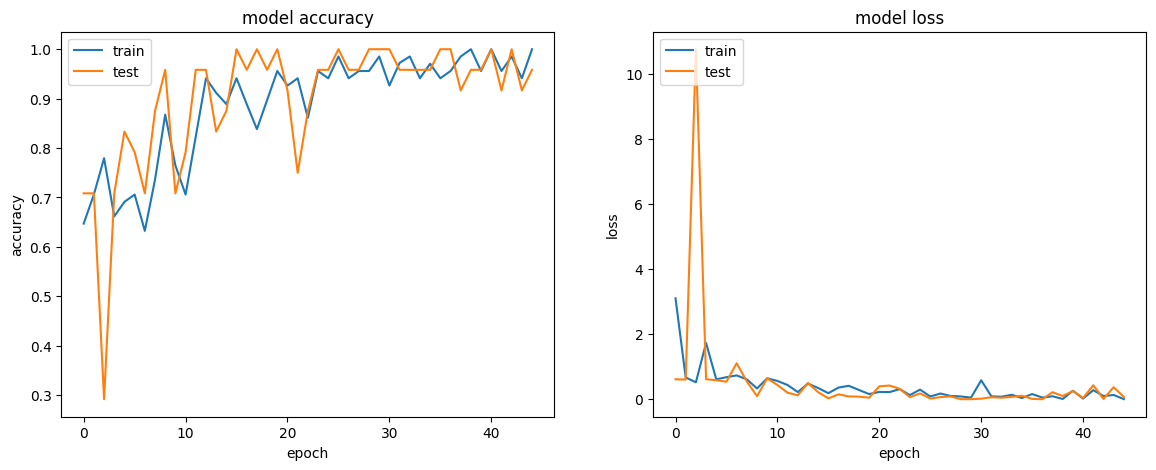

In [29]:


# Plot the training and validation metrics
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper left')

plt.show()


In [31]:
label =validation_generator.classes
pred = model.predict(validation_generator)
predicted_class_indices =np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print(labels)
print(predictions)

4/4 [==============================] - 1s 182ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{'covid': 0, 'normal': 1}
['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid']


<Axes: >

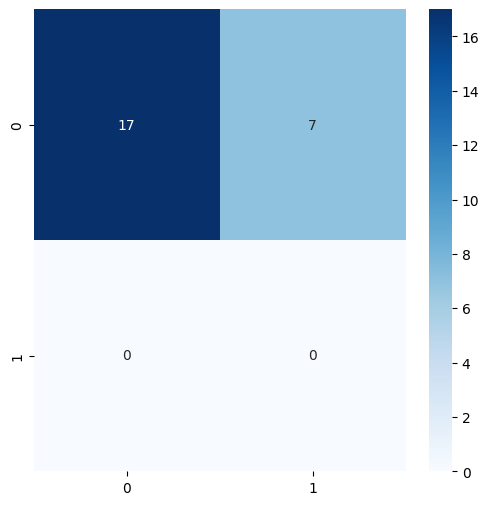

In [33]:
plt.figure(figsize =(6,6))
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(predicted_class_indices,label)
sns.heatmap(cf,cmap = "Blues",linecolor = "black",annot = True,fmt='')